## 1. Download Libraries and Datasets, Explore the data.

#### Let's import and install all the libraries we will be needing throughout the project.

In [1]:
!pip install geopy

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 102kB 15.4MB/s ta 0:00:01
Libraries imported.


#### In my analysis, I will be using median housing prices in Los Angeles dataset I gathered from University of Southern California School of Public Policy; USC Price.

So let's download that into a dataframe using Pandas library.

In [2]:
la_rent = pd.read_csv('RentPriceLA.csv')
la_rent.head()


Policy Area     Dataset           Variable  Year  Amount  \
0  Housing & Real Estate  Rent Price  Median Rent Price  2010  1236.0   
1  Housing & Real Estate  Rent Price  Median Rent Price  2010  1483.0   
2  Housing & Real Estate  Rent Price  Median Rent Price  2010  1086.0   
3  Housing & Real Estate  Rent Price  Median Rent Price  2010  1231.0   
4  Housing & Real Estate  Rent Price  Median Rent Price  2011  1391.0   

                                               Tract  Tract Number  \
0  Census Tract 1247, Los Angeles County, California        124700   
1  Census Tract 5038.01, Los Angeles County, Cali...        503801   
2  Census Tract 5739.02, Los Angeles County, Cali...        573902   
3  Census Tract 5766.02, Los Angeles County, Cali...        576602   
4  Census Tract 1247, Los Angeles County, California        124700   

   Neighborhood                 GEOID                              Location  \
0  Sherman Oaks  1400000US06037124700  (34.162466912294, -118.413864499994)   
1     La Mirada  1400000US06037503801       (33.899102856233, -117.9936485)   
2    Long Beach  1400000US06037573902       (33.8119735, -118.078652493167)   
3    Long Beach  1400000US06037576602  (33.765980150191, -118.170779302632)   
4  Sherman Oaks  1400000US06037124700  (34.162466912294, -118.413864499994)   

                                        Row ID        Date  
0  Median_Rent_Price_2010_1400000US06037124700  01/01/2010  
1  Median_Rent_Price_2010_1400000US06037503801  01/01/2010  
2  Median_Rent_Price_2010_1400000US06037573902  01/01/2010  
3  Median_Rent_Price_2010_1400000US06037576602  01/01/2010  
4  Median_Rent_Price_2011_1400000US06037124700  01/01/2011

#### Let's see what years are included in the data:

In [3]:
la_rent['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [4]:
la_rent = la_rent.rename(columns={'Amount': 'Rent Price'})

In [5]:
# Let's drop the unnecessary columns we won't be using. 
la_rent = la_rent.drop(['Policy Area','Variable','Tract','Tract Number','GEOID','Row ID','Date'], axis=1)
la_rent.head()

Dataset  Year  Rent Price  Neighborhood  \
0  Rent Price  2010      1236.0  Sherman Oaks   
1  Rent Price  2010      1483.0     La Mirada   
2  Rent Price  2010      1086.0    Long Beach   
3  Rent Price  2010      1231.0    Long Beach   
4  Rent Price  2011      1391.0  Sherman Oaks   

                               Location  
0  (34.162466912294, -118.413864499994)  
1       (33.899102856233, -117.9936485)  
2       (33.8119735, -118.078652493167)  
3  (33.765980150191, -118.170779302632)  
4  (34.162466912294, -118.413864499994)

In [6]:
#Let's seperate location data into latitude and longitude.
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in la_rent['Location']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
la_rent['Latitude'] = lat
la_rent['Longitude'] = lon

In [7]:
# Removing brackets from coordinates.
la_rent['Latitude'] = la_rent['Latitude'].str.replace('(','')
la_rent['Longitude'] = la_rent['Longitude'].str.replace(')','')
la_rent.head()

Dataset  Year  Rent Price  Neighborhood  \
0  Rent Price  2010      1236.0  Sherman Oaks   
1  Rent Price  2010      1483.0     La Mirada   
2  Rent Price  2010      1086.0    Long Beach   
3  Rent Price  2010      1231.0    Long Beach   
4  Rent Price  2011      1391.0  Sherman Oaks   

                               Location         Latitude           Longitude  
0  (34.162466912294, -118.413864499994)  34.162466912294   -118.413864499994  
1       (33.899102856233, -117.9936485)  33.899102856233        -117.9936485  
2       (33.8119735, -118.078652493167)       33.8119735   -118.078652493167  
3  (33.765980150191, -118.170779302632)  33.765980150191   -118.170779302632  
4  (34.162466912294, -118.413864499994)  34.162466912294   -118.413864499994

In [8]:
# Dropping Location column that is no longer of use.
la_rent.drop(['Location'], axis=1, inplace=True)

In [9]:
la_rent.dropna(inplace=True)

In [10]:
# Changing data types of coordinates from object to float.
la_rent['Latitude'] = la_rent['Latitude'].astype(float)
la_rent['Longitude'] = la_rent['Longitude'].astype(float)

In [11]:
# Getting median house rent prices, coordinates, and year of data for each neighborhood.
la_rent_med = la_rent.groupby('Neighborhood').mean()
la_rent_med.head()

Year   Rent Price   Latitude   Longitude
Neighborhood                                                    
Acton            2012.583333  1647.500000  34.497483 -118.206372
Adams-Normandie  2013.000000   920.742857  34.031700 -118.299543
Agoura Hills     2012.900000  2052.500000  34.155534 -118.765098
Agua Dulce       2012.000000  1130.200000  34.514900 -118.307700
Alhambra         2013.000000  1205.564286  34.084448 -118.135322

In [12]:
# Resetting index names so we can plot the folium map. 
la_rent_med.reset_index(inplace=True)
la_rent_med.head()

Neighborhood         Year   Rent Price   Latitude   Longitude
0            Acton  2012.583333  1647.500000  34.497483 -118.206372
1  Adams-Normandie  2013.000000   920.742857  34.031700 -118.299543
2     Agoura Hills  2012.900000  2052.500000  34.155534 -118.765098
3       Agua Dulce  2012.000000  1130.200000  34.514900 -118.307700
4         Alhambra  2013.000000  1205.564286  34.084448 -118.135322

### Let's plot the map of Los Angeles with all neighboorhoods shown with blue markers.

In [13]:
#First we get the coordinates of Los Angeles, using Geocoder.
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


In [14]:
# We use folium library to visualize all the neighborhoods in Los Angeles on the map.

map_los_angeles = folium.Map(location=[latitude,longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(la_rent_med['Latitude'], la_rent_med['Longitude'], la_rent_med['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_los_angeles)  
    
map_los_angeles

#### In this report, we will be using Foursquare as another source of data. 
#### So, Foursquare API will be our middle man to gather all the data we need to forecast where to open our restaurant.

In [27]:
# Foursquare is charging for certain calls made over the API so even though we will be using the freemium version, we will need below keys to open the gate. 

CLIENT_ID = '5FGKFF5DNJTQAUSGV1VFXHIB1N5GUUGEE0ZNE2ILVKI34Y3J' # your Foursquare ID
CLIENT_SECRET = '25GZGU2WSFZTCSWIOA15Z32PAMDR22T3L52NBLWAJRS03CRL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 5FGKFF5DNJTQAUSGV1VFXHIB1N5GUUGEE0ZNE2ILVKI34Y3J
CLIENT_SECRET:25GZGU2WSFZTCSWIOA15Z32PAMDR22T3L52NBLWAJRS03CRL


In [28]:
#In order to concatenate housing and neighborhood dataset with venues data gathered from Foursquare API we need the following function:

LIMIT = 10000
Radius = 10000

def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',          
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
#Let's call all the new information available to a new dataset.
los_angeles_venues = getNearbyVenues(names=la_rent_med['Neighborhood'],
                                   latitudes=la_rent_med['Latitude'],
                                   longitudes=la_rent_med['Longitude']
                                  )

Acton
Adams-Normandie
Agoura Hills
Agua Dulce
Alhambra
Alondra Park
Altadena
Angeles Crest
Arcadia
Arleta
Arlington Heights
Artesia
Athens
Atwater Village
Avalon
Avocado Heights
Azusa
Baldwin Hills/Crenshaw
Baldwin Park
Bel-Air
Bell
Bell Gardens
Bellflower
Beverly Crest
Beverly Grove
Beverly Hills
Beverlywood
Boyle Heights
Bradbury
Brentwood
Broadway-Manchester
Burbank
Calabasas
Canoga Park
Carson
Carthay
Castaic
Castaic Canyons
Central-Alameda
Century City
Cerritos
Charter Oak
Chatsworth
Chatsworth Reservoir
Chesterfield Square
Cheviot Hills
Chinatown
Citrus
Claremont
Commerce
Compton
Covina
Cudahy
Culver City
Cypress Park
Del Aire
Del Rey
Diamond Bar
Downey
Downtown
Duarte
Eagle Rock
East Compton
East Hollywood
East La Mirada
East Los Angeles
East Pasadena
East San Gabriel
Echo Park
El Monte
El Segundo
El Sereno
Elizabeth Lake
Elysian Park
Elysian Valley
Encino
Exposition Park
Fairfax
Florence
Florence-Firestone
Gardena
Glassell Park
Glendale
Glendora
Gramercy Park
Granada Hills
Gree

In [30]:
#Let's see how many rows and columns we have in our new dataset.
los_angeles_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Acton              34.497483             -118.206372   
1        Acton              34.497483             -118.206372   
2        Acton              34.497483             -118.206372   
3        Acton              34.497483             -118.206372   
4        Acton              34.497483             -118.206372   

                          Venue  Venue Latitude  Venue Longitude  \
0  Acton Market & Country Store       34.468451      -118.197633   
1               Jack in the Box       34.492398      -118.199205   
2                  Animal Acres       34.495853      -118.222415   
3                     La Cabaña       34.479308      -118.166997   
4            Crazy Otto's Diner       34.490733      -118.162548   

         Venue Category  
0         Grocery Store  
1  Fast Food Restaurant  
2                  Farm  
3    Mexican Restaurant  
4        Breakfast Spot

In [31]:
#Let's group the total number of items we have in our dataset to have a better understanding of what we are dealing with.
#To clarify; radius will be limited to 10k meters, in order to keep things simple.
los_angeles_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                   
Acton                                                     22   
Adams-Normandie                                          100   
Agoura Hills                                             100   
Agua Dulce                                                14   
Alhambra                                                 100   
Alondra Park                                             100   
Altadena                                                 100   
Angeles Crest                                              5   
Arcadia                                                  100   
Arleta                                                   100   
Arlington Heights                                        100   
Artesia                                                  100   
Athens                                                   100   
Atwater Village                                          100   
Avalon                                                    60   
Avocado Heights                                          100   
Azusa                                                    100   
Baldwin Hills/Crenshaw                                   100   
Baldwin Park                                             100   
Bel-Air                                                  100   
Bell                                                     100   
Bell Gardens                                             100   
Bellflower                                               100   
Beverly Crest                                            100   
Beverly Grove                                            100   
Beverly Hills                                            100   
Beverlywood                                              100   
Boyle Heights                                            100   
Bradbury                                                 100   
Brentwood                                                100   
Broadway-Manchester                                      100   
Burbank                                                  100   
Calabasas                                                100   
Canoga Park                                              100   
Carson                                                   100   
Carthay                                                  100   
Castaic                                                  100   
Castaic Canyons                                           98   
Central-Alameda                                          100   
Century City                                             100   
Cerritos                                                 100   
Charter Oak                                              100   
Chatsworth                                               100   
Chatsworth Reservoir                                     100   
Chesterfield Square                                      100   
Cheviot Hills                                            100   
Chinatown                                                100   
Citrus                                                   100   
Claremont                                                100   
Commerce                                                 100   
Compton                                                  100   
Covina                                                   100   
Cudahy                                                   100   
Culver City                                              100   
Cypress Park                                             100   
Del Aire                                                 100   
Del Rey                                                  100   
Diamond Bar                                              100   
Downey                                                   100   
Downtown                                                 100   
Duarte                                                   100   
Eagle R

In [32]:
print('There are {} uniques categories.'.format(len(los_angeles_venues['Venue Category'].unique())))

There are 344 uniques categories.


In [33]:
# One hot encoding: we turn categorical values in to zeros and ones to better accomodate Machine Learning algorithms.
los_angeles_onehot = pd.get_dummies(los_angeles_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
los_angeles_onehot['Neighborhood'] = los_angeles_venues['Neighborhood'] 
los_angeles_onehot.set_index('Neighborhood', inplace = True)
los_angeles_onehot.reset_index(inplace=True)
los_angeles_onehot.head()

Neighborhood  ATM  Accessories Store  Adult Boutique  Airport  \
0        Acton    0                  0               0        0   
1        Acton    0                  0               0        0   
2        Acton    0                  0               0        0   
3        Acton    0                  0               0        0   
4        Acton    0                  0               0        0   

   Airport Service  American Restaurant  Amphitheater  Animal Shelter  \
0                0                    0             0               0   
1                0                    0             0               0   
2                0                    0             0               0   
3                0                    0             0               0   
4                0                    0             0               0   

   Antique Shop  Aquarium  Arcade  Argentinian Restaurant  Art Gallery  \
0             0         0       0                       0            0   
1             0         0       0                       0            0   
2             0         0       0                       0            0   
3             0         0       0                       0            0   
4             0         0       0                       0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Australian Restaurant  Auto Dealership  Auto Garage  Automotive Shop  \
0                      0                0            0                0   
1                      0                0            0                0   
2                      0                0            0                0   
3                      0                0            0                0   
4                      0                0            0                0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0          0           0       0     0    0               0                 0   
1          0           0       0     0    0               0                 0   
2          0           0       0     0    0               0                 0   
3          0           0       0     0    0               0                 0   
4          0           0       0     0    0               0                 0   

   Basketball Court  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0                 0                   0      0                0         0   
1                 0                   0      0                0         0   
2                 0                   0      0                0         0   
3                 0                   0      0                0         0   
4                 0                   0      0                0         0   

   Beer Garden  Big Box Store  Bike Shop  Bistro  Boat or Ferry  Bookstore  \
0            0              0          0       0              0          0   
1            0              0          0       0              0          0   
2            0              0          0       0              0          0   
3            0              0          0       0              0          0   
4            0              0          0       0              0          0   

   Boutique  Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot  \
0         0              0           0                     0               0   
1         0              0           0                     0               0   
2         0              0           0                     0               0   
3         0              0           0                     0        

In [34]:
#Calculating frequencies of each category appearing in each neighbourhood.
los_angeles_grouped = los_angeles_onehot.groupby('Neighborhood').mean().reset_index()
los_angeles_grouped

Neighborhood       ATM  Accessories Store  \
0                                    Acton  0.000000               0.00   
1                          Adams-Normandie  0.000000               0.00   
2                             Agoura Hills  0.000000               0.00   
3                               Agua Dulce  0.000000               0.00   
4                                 Alhambra  0.000000               0.00   
5                             Alondra Park  0.000000               0.00   
6                                 Altadena  0.000000               0.00   
7                            Angeles Crest  0.000000               0.00   
8                                  Arcadia  0.000000               0.00   
9                                   Arleta  0.000000               0.00   
10                       Arlington Heights  0.000000               0.00   
11                                 Artesia  0.000000               0.00   
12                                  Athens  0.000000               0.00   
13                         Atwater Village  0.000000               0.00   
14                                  Avalon  0.016667               0.00   
15                         Avocado Heights  0.000000               0.00   
16                                   Azusa  0.000000               0.00   
17                  Baldwin Hills/Crenshaw  0.000000               0.00   
18                            Baldwin Park  0.000000               0.00   
19                                 Bel-Air  0.000000               0.00   
20                                    Bell  0.000000               0.01   
21                            Bell Gardens  0.000000               0.01   
22                              Bellflower  0.000000               0.00   
23                           Beverly Crest  0.000000               0.00   
24                           Beverly Grove  0.000000               0.00   
25                           Beverly Hills  0.000000               0.00   
26                             Beverlywood  0.000000               0.00   
27                           Boyle Heights  0.000000               0.00   
28                                Bradbury  0.000000               0.00   
29                               Brentwood  0.000000               0.00   
30                     Broadway-Manchester  0.000000               0.00   
31                                 Burbank  0.000000               0.00   
32                               Calabasas  0.000000               0.00   
33                             Canoga Park  0.000000               0.00   
34                                  Carson  0.000000               0.00   
35                                 Carthay  0.000000               0.00   
36                                 Castaic  0.000000               0.00   
37                         Castaic Canyons  0.000000               0.00   
38                         Central-Alameda  0.000000               0.00   
39                            Century City  0.000000               0.00   
40                                Cerritos  0.000000               0.00   
41                             Charter Oak  0.000000               0.00   
42                              Chatsworth  0.000000               0.00   
43                    Chatsworth Reservoir  0.000000               0.00   
44                     Chesterfield Square  0.000000               0.00   
45                           Cheviot Hills  0.000000               0.00   
46                               Chinatown  0.000000               0.00   
47                                  Citrus  0.000000               0.00   
48                               Claremont  0.000000               0.00   
49                                Commerce  0.000000               0.01   
50                                 Compton  0.000000               0.00   
51                                  Covina  0.000000               0.00   
52                                  Cudahy  0.000000   

In [35]:
#Scaling down categories to columns that include word "Restaurant"
los_angeles_restaurants_grouped = los_angeles_grouped.loc[:, los_angeles_grouped.columns.str.contains('Restaurant')]
los_angeles_restaurants_grouped.head()

American Restaurant  Argentinian Restaurant  Asian Restaurant  \
0             0.045455                     0.0              0.00   
1             0.020000                     0.0              0.00   
2             0.060000                     0.0              0.01   
3             0.000000                     0.0              0.00   
4             0.020000                     0.0              0.00   

   Australian Restaurant  Brazilian Restaurant  Burmese Restaurant  \
0                    0.0                   0.0                 0.0   
1                    0.0                   0.0                 0.0   
2                    0.0                   0.0                 0.0   
3                    0.0                   0.0                 0.0   
4                    0.0                   0.0                 0.0   

   Cajun / Creole Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0                        0.0                   0.0                 0.0   
1                        0.0                   0.0                 0.0   
2                        0.0                   0.0                 0.0   
3                        0.0                   0.0                 0.0   
4                        0.0                   0.0                 0.0   

   Comfort Food Restaurant  Cuban Restaurant  Donburi Restaurant  \
0                      0.0               0.0                 0.0   
1                      0.0               0.0                 0.0   
2                      0.0               0.0                 0.0   
3                      0.0               0.0                 0.0   
4                      0.0               0.0                 0.0   

   Dumpling Restaurant  Ethiopian Restaurant  Falafel Restaurant  \
0                  0.0                   0.0                 0.0   
1                  0.0                   0.0                 0.0   
2                  0.0                   0.0                 0.0   
3                  0.0                   0.0                 0.0   
4                  0.0                   0.0                 0.0   

   Fast Food Restaurant  Filipino Restaurant  French Restaurant  \
0              0.090909                 0.00           0.000000   
1              0.000000                 0.01           0.020000   
2              0.020000                 0.00           0.010000   
3              0.000000                 0.00           0.071429   
4              0.010000                 0.00           0.000000   

   German Restaurant  Gluten-free Restaurant  Greek Restaurant  \
0               0.00                    0.00               0.0   
1               0.01                    0.00               0.0   
2               0.00                    0.00               0.0   
3               0.00                    0.00               0.0   
4               0.00                    0.01               0.0   

   Hawaiian Restaurant  Hotpot Restaurant  Indian Restaurant  \
0                  0.0                0.0               0.00   
1                  0.0                0.0               0.00   
2                  0.0                0.0               0.02   
3                  0.0                0.0               0.00   
4                  0.0                0.0               0.00   

   Indonesian Restaurant  Italian Restaurant  Japanese Curry Restaurant  \
0                    0.0                0.00                        0.0   
1                    0.0                0.02                        0.0   
2                    0.0                0.03                        0.0   
3                    0.0                0.00                        0.0   
4                    0.0                0.01                        0.0   

   Japanese Restaurant  Kebab Restaurant  Korean Restaurant  \
0                 0.00               0.0               0.00   
1                 0.02               0.0               0.03   
2                 0.01               0.0               0.00   
3                 0.00

In [36]:
#Adding back Neighborhood column and resetting index so that we can manipulate its data.
los_angeles_restaurants_grouped['Neighborhood'] = los_angeles_grouped['Neighborhood'] 
los_angeles_restaurants_grouped.set_index('Neighborhood', inplace = True)
los_angeles_restaurants_grouped.reset_index(inplace=True)
los_angeles_restaurants_grouped.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Neighborhood  American Restaurant  Argentinian Restaurant  \
0            Acton             0.045455                     0.0   
1  Adams-Normandie             0.020000                     0.0   
2     Agoura Hills             0.060000                     0.0   
3       Agua Dulce             0.000000                     0.0   
4         Alhambra             0.020000                     0.0   

   Asian Restaurant  Australian Restaurant  Brazilian Restaurant  \
0              0.00                    0.0                   0.0   
1              0.00                    0.0                   0.0   
2              0.01                    0.0                   0.0   
3              0.00                    0.0                   0.0   
4              0.00                    0.0                   0.0   

   Burmese Restaurant  Cajun / Creole Restaurant  Caribbean Restaurant  \
0                 0.0                        0.0                   0.0   
1                 0.0                        0.0                   0.0   
2                 0.0                        0.0                   0.0   
3                 0.0                        0.0                   0.0   
4                 0.0                        0.0                   0.0   

   Chinese Restaurant  Comfort Food Restaurant  Cuban Restaurant  \
0                 0.0                      0.0               0.0   
1                 0.0                      0.0               0.0   
2                 0.0                      0.0               0.0   
3                 0.0                      0.0               0.0   
4                 0.0                      0.0               0.0   

   Donburi Restaurant  Dumpling Restaurant  Ethiopian Restaurant  \
0                 0.0                  0.0                   0.0   
1                 0.0                  0.0                   0.0   
2                 0.0                  0.0                   0.0   
3                 0.0                  0.0                   0.0   
4                 0.0                  0.0                   0.0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                 0.0              0.090909                 0.00   
1                 0.0              0.000000                 0.01   
2                 0.0              0.020000                 0.00   
3                 0.0              0.000000                 0.00   
4                 0.0              0.010000                 0.00   

   French Restaurant  German Restaurant  Gluten-free Restaurant  \
0           0.000000               0.00                    0.00   
1           0.020000               0.01                    0.00   
2           0.010000               0.00                    0.00   
3           0.071429               0.00                    0.00   
4           0.000000               0.00                    0.01   

   Greek Restaurant  Hawaiian Restaurant  Hotpot Restaurant  \
0               0.0                  0.0                0.0   
1               0.0                  0.0                0.0   
2               0.0                  0.0                0.0   
3               0.0                  0.0                0.0   
4               0.0                  0.0                0.0   

   Indian Restaurant  Indonesian Restaurant  Italian Restaurant  \
0               0.00                    0.0                0.00   
1               0.00                    0.0                0.02   
2               0.02                    0.0                0.03   
3               0.00                    0.0                0.00   
4               0.00                    0.0                0.01   

   Japanese Curry Restaurant  Japanese Restaurant  Kebab Restaurant  \
0                        0.0                 0.00               0.0   
1                        0.0                 0.02               0.0   
2                        0.0                 0.01               0.0   
3                        0.0                 0.00    

## Finding the percentage of fast food restaurants among other restaurant categories.

In [37]:
#Checking the shape of the new dataframe.
los_angeles_restaurants_grouped.shape

(259, 55)

In [38]:
#Summing up all the rows first.
los_angeles_restaurants_grouped['Sum'] = los_angeles_restaurants_grouped.sum(axis=1)
los_angeles_restaurants_grouped.head()                                                      

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Neighborhood  American Restaurant  Argentinian Restaurant  \
0            Acton             0.045455                     0.0   
1  Adams-Normandie             0.020000                     0.0   
2     Agoura Hills             0.060000                     0.0   
3       Agua Dulce             0.000000                     0.0   
4         Alhambra             0.020000                     0.0   

   Asian Restaurant  Australian Restaurant  Brazilian Restaurant  \
0              0.00                    0.0                   0.0   
1              0.00                    0.0                   0.0   
2              0.01                    0.0                   0.0   
3              0.00                    0.0                   0.0   
4              0.00                    0.0                   0.0   

   Burmese Restaurant  Cajun / Creole Restaurant  Caribbean Restaurant  \
0                 0.0                        0.0                   0.0   
1                 0.0                        0.0                   0.0   
2                 0.0                        0.0                   0.0   
3                 0.0                        0.0                   0.0   
4                 0.0                        0.0                   0.0   

   Chinese Restaurant  Comfort Food Restaurant  Cuban Restaurant  \
0                 0.0                      0.0               0.0   
1                 0.0                      0.0               0.0   
2                 0.0                      0.0               0.0   
3                 0.0                      0.0               0.0   
4                 0.0                      0.0               0.0   

   Donburi Restaurant  Dumpling Restaurant  Ethiopian Restaurant  \
0                 0.0                  0.0                   0.0   
1                 0.0                  0.0                   0.0   
2                 0.0                  0.0                   0.0   
3                 0.0                  0.0                   0.0   
4                 0.0                  0.0                   0.0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                 0.0              0.090909                 0.00   
1                 0.0              0.000000                 0.01   
2                 0.0              0.020000                 0.00   
3                 0.0              0.000000                 0.00   
4                 0.0              0.010000                 0.00   

   French Restaurant  German Restaurant  Gluten-free Restaurant  \
0           0.000000               0.00                    0.00   
1           0.020000               0.01                    0.00   
2           0.010000               0.00                    0.00   
3           0.071429               0.00                    0.00   
4           0.000000               0.00                    0.01   

   Greek Restaurant  Hawaiian Restaurant  Hotpot Restaurant  \
0               0.0                  0.0                0.0   
1               0.0                  0.0                0.0   
2               0.0                  0.0                0.0   
3               0.0                  0.0                0.0   
4               0.0                  0.0                0.0   

   Indian Restaurant  Indonesian Restaurant  Italian Restaurant  \
0               0.00                    0.0                0.00   
1               0.00                    0.0                0.02   
2               0.02                    0.0                0.03   
3               0.00                    0.0                0.00   
4               0.00                    0.0                0.01   

   Japanese Curry Restaurant  Japanese Restaurant  Kebab Restaurant  \
0                        0.0                 0.00               0.0   
1                        0.0                 0.02               0.0   
2                        0.0                 0.01               0.0   
3                        0.0                 0.00    

In [39]:
#Finding the ratios of fast food restaurants by dividing the frequency of row sums by fast food restaurant restaurant frequencies of each row.
los_angeles_restaurants_grouped['Ratio'] = los_angeles_restaurants_grouped.loc[:,"Fast Food Restaurant"].div(los_angeles_restaurants_grouped['Sum'], axis=0)
los_angeles_restaurants_grouped.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Neighborhood  American Restaurant  Argentinian Restaurant  \
0            Acton             0.045455                     0.0   
1  Adams-Normandie             0.020000                     0.0   
2     Agoura Hills             0.060000                     0.0   
3       Agua Dulce             0.000000                     0.0   
4         Alhambra             0.020000                     0.0   

   Asian Restaurant  Australian Restaurant  Brazilian Restaurant  \
0              0.00                    0.0                   0.0   
1              0.00                    0.0                   0.0   
2              0.01                    0.0                   0.0   
3              0.00                    0.0                   0.0   
4              0.00                    0.0                   0.0   

   Burmese Restaurant  Cajun / Creole Restaurant  Caribbean Restaurant  \
0                 0.0                        0.0                   0.0   
1                 0.0                        0.0                   0.0   
2                 0.0                        0.0                   0.0   
3                 0.0                        0.0                   0.0   
4                 0.0                        0.0                   0.0   

   Chinese Restaurant  Comfort Food Restaurant  Cuban Restaurant  \
0                 0.0                      0.0               0.0   
1                 0.0                      0.0               0.0   
2                 0.0                      0.0               0.0   
3                 0.0                      0.0               0.0   
4                 0.0                      0.0               0.0   

   Donburi Restaurant  Dumpling Restaurant  Ethiopian Restaurant  \
0                 0.0                  0.0                   0.0   
1                 0.0                  0.0                   0.0   
2                 0.0                  0.0                   0.0   
3                 0.0                  0.0                   0.0   
4                 0.0                  0.0                   0.0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                 0.0              0.090909                 0.00   
1                 0.0              0.000000                 0.01   
2                 0.0              0.020000                 0.00   
3                 0.0              0.000000                 0.00   
4                 0.0              0.010000                 0.00   

   French Restaurant  German Restaurant  Gluten-free Restaurant  \
0           0.000000               0.00                    0.00   
1           0.020000               0.01                    0.00   
2           0.010000               0.00                    0.00   
3           0.071429               0.00                    0.00   
4           0.000000               0.00                    0.01   

   Greek Restaurant  Hawaiian Restaurant  Hotpot Restaurant  \
0               0.0                  0.0                0.0   
1               0.0                  0.0                0.0   
2               0.0                  0.0                0.0   
3               0.0                  0.0                0.0   
4               0.0                  0.0                0.0   

   Indian Restaurant  Indonesian Restaurant  Italian Restaurant  \
0               0.00                    0.0                0.00   
1               0.00                    0.0                0.02   
2               0.02                    0.0                0.03   
3               0.00                    0.0                0.00   
4               0.00                    0.0                0.01   

   Japanese Curry Restaurant  Japanese Restaurant  Kebab Restaurant  \
0                        0.0                 0.00               0.0   
1                        0.0                 0.02               0.0   
2                        0.0                 0.01               0.0   
3                        0.0                 0.00    

## In order to have a better understanding of restaurants around each Neighborhood, we can call top 10 restaurant categories by their frequencies.

In [40]:
#Filling not available values with zeros, so that we don't have any problems while calling top restaurant categories from Foursquare API.
los_angeles_restaurants_grouped['Ratio'] = los_angeles_restaurants_grouped['Ratio'].fillna(0)
los_angeles_restaurants_grouped.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Neighborhood  American Restaurant  Argentinian Restaurant  \
0            Acton             0.045455                     0.0   
1  Adams-Normandie             0.020000                     0.0   
2     Agoura Hills             0.060000                     0.0   
3       Agua Dulce             0.000000                     0.0   
4         Alhambra             0.020000                     0.0   

   Asian Restaurant  Australian Restaurant  Brazilian Restaurant  \
0              0.00                    0.0                   0.0   
1              0.00                    0.0                   0.0   
2              0.01                    0.0                   0.0   
3              0.00                    0.0                   0.0   
4              0.00                    0.0                   0.0   

   Burmese Restaurant  Cajun / Creole Restaurant  Caribbean Restaurant  \
0                 0.0                        0.0                   0.0   
1                 0.0                        0.0                   0.0   
2                 0.0                        0.0                   0.0   
3                 0.0                        0.0                   0.0   
4                 0.0                        0.0                   0.0   

   Chinese Restaurant  Comfort Food Restaurant  Cuban Restaurant  \
0                 0.0                      0.0               0.0   
1                 0.0                      0.0               0.0   
2                 0.0                      0.0               0.0   
3                 0.0                      0.0               0.0   
4                 0.0                      0.0               0.0   

   Donburi Restaurant  Dumpling Restaurant  Ethiopian Restaurant  \
0                 0.0                  0.0                   0.0   
1                 0.0                  0.0                   0.0   
2                 0.0                  0.0                   0.0   
3                 0.0                  0.0                   0.0   
4                 0.0                  0.0                   0.0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                 0.0              0.090909                 0.00   
1                 0.0              0.000000                 0.01   
2                 0.0              0.020000                 0.00   
3                 0.0              0.000000                 0.00   
4                 0.0              0.010000                 0.00   

   French Restaurant  German Restaurant  Gluten-free Restaurant  \
0           0.000000               0.00                    0.00   
1           0.020000               0.01                    0.00   
2           0.010000               0.00                    0.00   
3           0.071429               0.00                    0.00   
4           0.000000               0.00                    0.01   

   Greek Restaurant  Hawaiian Restaurant  Hotpot Restaurant  \
0               0.0                  0.0                0.0   
1               0.0                  0.0                0.0   
2               0.0                  0.0                0.0   
3               0.0                  0.0                0.0   
4               0.0                  0.0                0.0   

   Indian Restaurant  Indonesian Restaurant  Italian Restaurant  \
0               0.00                    0.0                0.00   
1               0.00                    0.0                0.02   
2               0.02                    0.0                0.03   
3               0.00                    0.0                0.00   
4               0.00                    0.0                0.01   

   Japanese Curry Restaurant  Japanese Restaurant  Kebab Restaurant  \
0                        0.0                 0.00               0.0   
1                        0.0                 0.02               0.0   
2                        0.0                 0.01               0.0   
3                        0.0                 0.00    

In [41]:
# Dropping Sum and Ratio columns so that they don't appear inside the restaurant categories we call.
los_angeles_restaurants_grouped_na = los_angeles_restaurants_grouped.drop(['Sum','Ratio'], axis=1)
los_angeles_restaurants_grouped_na.head()

Neighborhood  American Restaurant  Argentinian Restaurant  \
0            Acton             0.045455                     0.0   
1  Adams-Normandie             0.020000                     0.0   
2     Agoura Hills             0.060000                     0.0   
3       Agua Dulce             0.000000                     0.0   
4         Alhambra             0.020000                     0.0   

   Asian Restaurant  Australian Restaurant  Brazilian Restaurant  \
0              0.00                    0.0                   0.0   
1              0.00                    0.0                   0.0   
2              0.01                    0.0                   0.0   
3              0.00                    0.0                   0.0   
4              0.00                    0.0                   0.0   

   Burmese Restaurant  Cajun / Creole Restaurant  Caribbean Restaurant  \
0                 0.0                        0.0                   0.0   
1                 0.0                        0.0                   0.0   
2                 0.0                        0.0                   0.0   
3                 0.0                        0.0                   0.0   
4                 0.0                        0.0                   0.0   

   Chinese Restaurant  Comfort Food Restaurant  Cuban Restaurant  \
0                 0.0                      0.0               0.0   
1                 0.0                      0.0               0.0   
2                 0.0                      0.0               0.0   
3                 0.0                      0.0               0.0   
4                 0.0                      0.0               0.0   

   Donburi Restaurant  Dumpling Restaurant  Ethiopian Restaurant  \
0                 0.0                  0.0                   0.0   
1                 0.0                  0.0                   0.0   
2                 0.0                  0.0                   0.0   
3                 0.0                  0.0                   0.0   
4                 0.0                  0.0                   0.0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                 0.0              0.090909                 0.00   
1                 0.0              0.000000                 0.01   
2                 0.0              0.020000                 0.00   
3                 0.0              0.000000                 0.00   
4                 0.0              0.010000                 0.00   

   French Restaurant  German Restaurant  Gluten-free Restaurant  \
0           0.000000               0.00                    0.00   
1           0.020000               0.01                    0.00   
2           0.010000               0.00                    0.00   
3           0.071429               0.00                    0.00   
4           0.000000               0.00                    0.01   

   Greek Restaurant  Hawaiian Restaurant  Hotpot Restaurant  \
0               0.0                  0.0                0.0   
1               0.0                  0.0                0.0   
2               0.0                  0.0                0.0   
3               0.0                  0.0                0.0   
4               0.0                  0.0                0.0   

   Indian Restaurant  Indonesian Restaurant  Italian Restaurant  \
0               0.00                    0.0                0.00   
1               0.00                    0.0                0.02   
2               0.02                    0.0                0.03   
3               0.00                    0.0                0.00   
4               0.00                    0.0                0.01   

   Japanese Curry Restaurant  Japanese Restaurant  Kebab Restaurant  \
0                        0.0                 0.00               0.0   
1                        0.0                 0.02               0.0   
2                        0.0                 0.01               0.0   
3                        0.0                 0.00    

In [42]:
#To avoid confusion, I make a new dataset that includes Neighborhood and Ratio columns. 
lagp = los_angeles_restaurants_grouped[['Neighborhood','Ratio']]
lagp.head()

Neighborhood     Ratio
0            Acton  0.500000
1  Adams-Normandie  0.000000
2     Agoura Hills  0.074074
3       Agua Dulce  0.000000
4         Alhambra  0.043478

In [43]:
#Then I join Rent Price, Year of Rent Price Data, Latitude and Longtitude of Neighborhoods.
#Actually we don't need year data at all, so in the next dataframe we drop it out.
lafp = pd.merge(lagp, la_rent_med, on='Neighborhood')
lafp.head()

Neighborhood     Ratio         Year   Rent Price   Latitude   Longitude
0            Acton  0.500000  2012.583333  1647.500000  34.497483 -118.206372
1  Adams-Normandie  0.000000  2013.000000   920.742857  34.031700 -118.299543
2     Agoura Hills  0.074074  2012.900000  2052.500000  34.155534 -118.765098
3       Agua Dulce  0.000000  2012.000000  1130.200000  34.514900 -118.307700
4         Alhambra  0.043478  2013.000000  1205.564286  34.084448 -118.135322

In [44]:
lafastprice=lafp[['Neighborhood','Rent Price','Ratio','Latitude','Longitude']]
lafastprice.head()

Neighborhood   Rent Price     Ratio   Latitude   Longitude
0            Acton  1647.500000  0.500000  34.497483 -118.206372
1  Adams-Normandie   920.742857  0.000000  34.031700 -118.299543
2     Agoura Hills  2052.500000  0.074074  34.155534 -118.765098
3       Agua Dulce  1130.200000  0.000000  34.514900 -118.307700
4         Alhambra  1205.564286  0.043478  34.084448 -118.135322

In [45]:
#To totally rinse the dataframe from Non-Fast Food Related items, I drop out all the 0 values under Ratio column.
lafastpricena = lafastprice[lafastprice.Ratio != 0]
lafastpricena.head()

Neighborhood   Rent Price     Ratio   Latitude   Longitude
0         Acton  1647.500000  0.500000  34.497483 -118.206372
2  Agoura Hills  2052.500000  0.074074  34.155534 -118.765098
4      Alhambra  1205.564286  0.043478  34.084448 -118.135322
5  Alondra Park  1667.142857  0.030303  33.885925 -118.335435
6      Altadena  1458.321429  0.050000  34.190096 -118.136334

In [46]:
lafastpricena

Neighborhood   Rent Price     Ratio   Latitude  \
0                                    Acton  1647.500000  0.500000  34.497483   
2                             Agoura Hills  2052.500000  0.074074  34.155534   
4                                 Alhambra  1205.564286  0.043478  34.084448   
5                             Alondra Park  1667.142857  0.030303  33.885925   
6                                 Altadena  1458.321429  0.050000  34.190096   
11                                 Artesia  1400.333333  0.096774  33.868564   
12                                  Athens   953.571429  0.021277  33.923776   
15                         Avocado Heights  1369.428571  0.066667  34.040892   
16                                   Azusa  1255.842857  0.107143  34.128691   
17                  Baldwin Hills/Crenshaw  1000.102041  0.043478  34.015943   
20                                    Bell  1002.346939  0.034483  33.974526   
21                            Bell Gardens  1085.761905  0.033333  33.965709   
22                              Bellflower  1178.880952  0.125000  33.886607   
28                                Bradbury  2166.428571  0.071429  34.154400   
32                               Calabasas  2061.190476  0.095238  34.145039   
33                             Canoga Park  1250.233333  0.045455  34.207139   
36                                 Castaic  2132.400000  0.047619  34.468820   
37                         Castaic Canyons  1547.709677  0.035714  34.468692   
40                                Cerritos  1983.155844  0.058824  33.866331   
41                             Charter Oak  1382.285714  0.250000  34.103073   
42                              Chatsworth  1727.486486  0.107143  34.257159   
43                    Chatsworth Reservoir  1743.285714  0.038462  34.228206   
44                     Chesterfield Square  1043.190476  0.038462  33.985345   
47                                  Citrus  1216.095238  0.120000  34.116587   
49                                Commerce   915.952381  0.033333  33.999195   
50                                 Compton  1048.958333  0.029412  33.897919   
51                                  Covina  1338.542857  0.086957  34.091443   
52                                  Cudahy  1114.476190  0.034483  33.963769   
53                             Culver City  1473.734694  0.034483  34.007789   
56                                 Del Rey  1478.163265  0.041667  33.992356   
57                             Diamond Bar  1796.920635  0.038462  33.997715   
58                                  Downey  1259.000000  0.078947  33.935504   
60                                  Duarte  1247.857143  0.035714  34.134489   
62                            East Compton  1120.428571  0.093750  33.901361   
64                          East La Mirada  1200.214286  0.062500  33.925507   
66                           East Pasadena  1297.857143  0.040000  34.140347   
67                        East San Gabriel  1439.542857  0.032258  34.118823   
80                                 Gardena  1121.790476  0.027778  33.889493   
83                                Glendora  1552.681319  0.250000  34.133977   
84                           Gramercy Park  1033.428571  0.022222  33.950917   
85                           Granada Hills  1818.312500  0.083333  34.279044   
88                        Hacienda Heights  1678.582418  0.066667  33.998103   
90                             Harbor City  1143.551020  0.055556  33.794036   
91                          Harbor Gateway  1017.232143  0.024390  33.874952   
94                        Hawaiian Gardens  1185.214286  0.090909  33.827040   
95                               Hawthorne  1145.476190  0.027778  33.912775   
96                           Hermosa Beach  1877.628571  0.032258  33.865555   
97                            Hidden Hills  1822.571429  0.100000  34.162707   
98                           Highland Park  1119.428571  0.055556  34.115733   
104                           

In [47]:
#Let's turn frequency ratio to percentage.
lafastpricena['Percentage']=lafastpricena['Ratio']*100
lafastpricena.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Neighborhood   Rent Price     Ratio   Latitude   Longitude  Percentage
0         Acton  1647.500000  0.500000  34.497483 -118.206372   50.000000
2  Agoura Hills  2052.500000  0.074074  34.155534 -118.765098    7.407407
4      Alhambra  1205.564286  0.043478  34.084448 -118.135322    4.347826
5  Alondra Park  1667.142857  0.030303  33.885925 -118.335435    3.030303
6      Altadena  1458.321429  0.050000  34.190096 -118.136334    5.000000

In [48]:
#Putting Rent Price and Percentage to the end of the table.
lafastpricena=lafastpricena[['Neighborhood','Latitude','Longitude','Rent Price','Percentage']]
lafastpricena.head()

Neighborhood   Latitude   Longitude   Rent Price  Percentage
0         Acton  34.497483 -118.206372  1647.500000   50.000000
2  Agoura Hills  34.155534 -118.765098  2052.500000    7.407407
4      Alhambra  34.084448 -118.135322  1205.564286    4.347826
5  Alondra Park  33.885925 -118.335435  1667.142857    3.030303
6      Altadena  34.190096 -118.136334  1458.321429    5.000000

In [49]:
#Changing space in Rent Price with an underscore so that the scatter plot doesn't confuse our code.
lafastpricena = lafastpricena.rename(columns={'Rent Price':'Rent_Price'})

In [50]:
#importing matplot libraries to visualize the data.
import matplotlib
import matplotlib.pyplot as plt


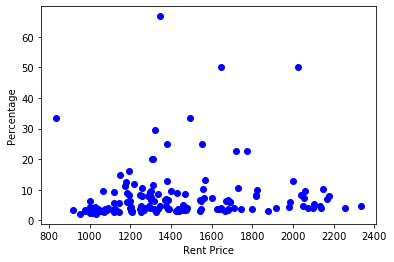

In [51]:
#Let's make a scatter plot to see whether we can spot a linear correlation between fast food restaurant ratios and median housing prices.
plt.scatter(lafastpricena.Rent_Price, lafastpricena.Percentage,  color='blue')
plt.xlabel("Rent Price")
plt.ylabel("Percentage")
plt.show()

#### It seems there is no linear relation between the number of fast food restaurants and rent prices in Los Angeles.

###### It's pretty much obvious that it won't be very easy to come up with a linear, non-linear, or polynomial regression model to explain any relationship between the number of fast food restaurants and rent prices.
###### So now we will try to use an unsupervised Machine Learning algorithm called K-Means clustering to put all the data into 5 different clusters.

In [52]:
# set number of clusters
kclusters = 5

lafastpricena_clustering = lafastpricena.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lafastpricena_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 1, 0, 2, 2, 4, 2, 1, 4], dtype=int32)

In [53]:
lafastpricena.head()

Neighborhood   Latitude   Longitude   Rent_Price  Percentage
0         Acton  34.497483 -118.206372  1647.500000   50.000000
2  Agoura Hills  34.155534 -118.765098  2052.500000    7.407407
4      Alhambra  34.084448 -118.135322  1205.564286    4.347826
5  Alondra Park  33.885925 -118.335435  1667.142857    3.030303
6      Altadena  34.190096 -118.136334  1458.321429    5.000000

In [54]:
# add clustering labels
lafastpricena.insert(0, 'Cluster Labels', kmeans.labels_)
lafastpricena.head() # check the last columns!

Cluster Labels  Neighborhood   Latitude   Longitude   Rent_Price  \
0               0         Acton  34.497483 -118.206372  1647.500000   
2               3  Agoura Hills  34.155534 -118.765098  2052.500000   
4               1      Alhambra  34.084448 -118.135322  1205.564286   
5               0  Alondra Park  33.885925 -118.335435  1667.142857   
6               2      Altadena  34.190096 -118.136334  1458.321429   

   Percentage  
0   50.000000  
2    7.407407  
4    4.347826  
5    3.030303  
6    5.000000

In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lafastpricena['Latitude'], lafastpricena['Longitude'], lafastpricena['Neighborhood'], lafastpricena['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 0

In [56]:
cluster_0 = lafastpricena.loc[lafastpricena['Cluster Labels'] == 0, lafastpricena.columns[[1,4] + list(range(5, lafastpricena.shape[1]))]]
cluster_0 = cluster_0.sort_values(by=['Rent_Price'], ascending=False)
cluster_0

Neighborhood   Rent_Price  Percentage
96                           Hermosa Beach  1877.628571    3.225806
97                            Hidden Hills  1822.571429   10.000000
85                           Granada Hills  1818.312500    8.333333
180                  Rolling Hills Estates  1816.222222    8.000000
57                             Diamond Bar  1796.920635    3.846154
172                                 Ramona  1776.142857   22.727273
43                    Chatsworth Reservoir  1743.285714    3.846154
42                              Chatsworth  1727.486486   10.714286
183                              San Dimas  1720.267857   22.727273
193                           Shadow Hills  1708.642857    4.000000
220  Unincorporated Santa Susana Mountains  1692.285714    5.882353
176                          Redondo Beach  1688.604396    6.060606
247                            Westchester  1682.311688    3.448276
167                            Playa Vista  1679.642857    3.846154
88                        Hacienda Heights  1678.582418    6.666667
182                        Rowland Heights  1671.640000    6.451613
5                             Alondra Park  1667.142857    3.030303
0                                    Acton  1647.500000   50.000000
195                           Sierra Madre  1646.571429    4.000000
175                            Rancho Park  1643.285714    3.846154
116                         Ladera Heights  1637.678571    3.703704
189                          Santa Clarita  1627.213523    3.846154
105                               Industry  1600.122449    7.407407

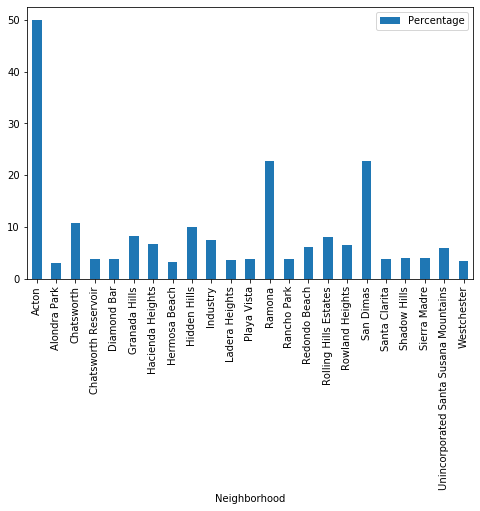

In [57]:
cluster_0 = lafastpricena.loc[lafastpricena['Cluster Labels'] == 0, lafastpricena.columns[[1,4] + list(range(5, lafastpricena.shape[1]))]]
cluster_00 = cluster_0[['Neighborhood','Percentage']]
cluster_00.set_index('Neighborhood', inplace=True)
cluster_00.plot(kind='bar', figsize=(8, 5))

### Cluster 1

In [58]:
cluster_1 = lafastpricena.loc[lafastpricena['Cluster Labels'] == 1, lafastpricena.columns[[1,4] + list(range(5, lafastpricena.shape[1]))]]
cluster_1 = cluster_1.sort_values(by=['Rent_Price'], ascending=False)
cluster_1

Neighborhood   Rent_Price  Percentage
205  Southeast Antelope Valley  1347.100000   66.666667
187                San Pasqual  1345.785714    4.761905
51                      Covina  1338.542857    8.695652
142              Mission Hills  1337.371429    3.846154
123                   Lawndale  1324.714286    2.631579
185                San Gabriel  1324.492063    3.333333
158                   Palmdale  1320.727679   29.629630
177                     Reseda  1317.252747    3.703704
190           Santa Fe Springs  1316.333333    6.451613
252                   Whittier  1313.341270   20.000000
204             South Whittier  1309.307692   11.538462
154         Northwest Palmdale  1304.428571   20.000000
246   West Whittier-Los Nietos  1301.309524    9.677419
222                    Valinda  1300.666667    7.692308
130        Lopez/Kagel Canyons  1300.285714    6.666667
66               East Pasadena  1297.857143    4.000000
164                Pico Rivera  1296.076923    9.375000
253           Whittier Narrows  1293.142857    4.761905
245         West Puente Valley  1288.600000    8.000000
128                     Lomita  1268.857143    3.333333
188                  San Pedro  1267.883117    4.166667
58                      Downey  1259.000000    7.894737
16                       Azusa  1255.842857   10.714286
233    View Park-Windsor Hills  1253.714286    3.225806
239                West Carson  1251.178571    2.631579
33                 Canoga Park  1250.233333    4.545455
60                      Duarte  1247.857143    3.571429
184               San Fernando  1246.714286    8.333333
47                      Citrus  1216.095238   12.000000
129                 Long Beach  1210.166891    2.702703
181                   Rosemead  1206.181818    2.941176
4                     Alhambra  1205.564286    4.347826
119          Lake View Terrace  1205.000000    3.125000
64              East La Mirada  1200.214286    6.250000
257                   Winnetka  1197.922078    4.166667
114                  La Puente  1195.125000    8.333333
171                Quartz Hill  1191.785714   16.000000
94            Hawaiian Gardens  1185.214286    9.090909
144                 Montebello  1185.153061    5.882353
22                  Bellflower  1178.880952   12.500000
162                  Paramount  1171.942857   11.111111

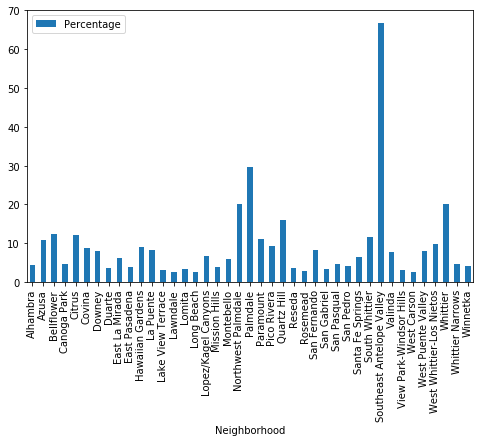

In [59]:
cluster_1 = lafastpricena.loc[lafastpricena['Cluster Labels'] == 1, lafastpricena.columns[[1,4] + list(range(5, lafastpricena.shape[1]))]]
cluster_11 = cluster_1[['Neighborhood','Percentage']]
cluster_11.set_index('Neighborhood', inplace=True)
cluster_11.plot(kind='bar', figsize=(8, 5))

### Cluster 2

In [60]:
cluster_2 = lafastpricena.loc[lafastpricena['Cluster Labels'] == 2, lafastpricena.columns[[1,4] + list(range(5, lafastpricena.shape[1]))]]
cluster_2 = cluster_2.sort_values(by=['Rent_Price'], ascending=False)
cluster_2

Neighborhood   Rent_Price  Percentage
115                   La Verne  1566.836735   13.043478
150             North Whittier  1560.571429    7.407407
120                   Lakewood  1555.817460   10.344828
83                    Glendora  1552.681319   25.000000
215                   Torrance  1548.619048    6.250000
37             Castaic Canyons  1547.709677    3.571429
117                Lake Balboa  1544.857143    2.941176
113                  La Mirada  1543.242857    6.666667
153  Northwest Antelope Valley  1494.428571   33.333333
56                     Del Rey  1478.163265    4.166667
53                 Culver City  1473.734694    3.448276
241                West Covina  1468.093168    8.695652
163                   Pasadena  1467.540084    4.347826
136                  Mar Vista  1459.442857    3.448276
6                     Altadena  1458.321429    5.000000
67            East San Gabriel  1439.542857    3.225806
209                    Sunland  1437.619048    3.703704
152                 Northridge  1435.612245    3.703704
210                     Sylmar  1427.904762    9.090909
201             South Pasadena  1426.628571    3.225806
11                     Artesia  1400.333333    9.677419
159                      Palms  1390.233766    3.571429
203       South San Jose Hills  1386.114286    6.666667
212                Temple City  1383.081633    3.571429
41                 Charter Oak  1382.285714   25.000000
155                    Norwalk  1378.666667   12.903226
234                    Vincent  1374.714286    4.545455
148                North Hills  1373.360825    6.896552
15             Avocado Heights  1369.428571    6.666667

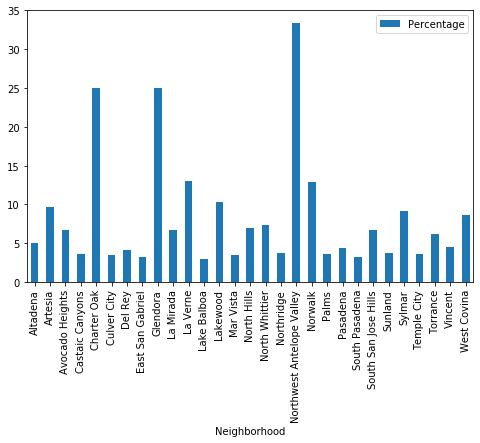

In [61]:
cluster_2 = lafastpricena.loc[lafastpricena['Cluster Labels'] == 2, lafastpricena.columns[[1,4] + list(range(5, lafastpricena.shape[1]))]]
cluster_22 = cluster_2[['Neighborhood','Percentage']]
cluster_22.set_index('Neighborhood', inplace=True)
cluster_22.plot(kind='bar', figsize=(8, 5))

### Cluster 3

In [62]:
cluster_3 = lafastpricena.loc[lafastpricena['Cluster Labels'] == 3, lafastpricena.columns[[1,4] + list(range(5, lafastpricena.shape[1]))]]
cluster_3 = cluster_3.sort_values(by=['Rent_Price'], ascending=False)
cluster_3

Neighborhood   Rent_Price  Percentage
186                             San Marino  2332.384615    4.761905
160                   Palos Verdes Estates  2256.380952    4.000000
170                           Porter Ranch  2179.347826    8.000000
28                                Bradbury  2166.428571    7.142857
249                       Westlake Village  2147.357143   10.344828
137                         Marina del Rey  2137.571429    4.000000
36                                 Castaic  2132.400000    4.761905
206                        Stevenson Ranch  2104.857143    5.263158
219  Unincorporated Santa Monica Mountains  2100.020408    4.166667
179                          Rolling Hills  2076.333333    4.166667
32                               Calabasas  2061.190476    9.523810
2                             Agoura Hills  2052.500000    7.407407
242                             West Hills  2049.068493    4.545455
235                                 Walnut  2038.026316    8.333333
126                           Leona Valley  2024.000000   50.000000
112                       La Habra Heights  2001.333333   12.903226
40                                Cerritos  1983.155844    5.882353
258                         Woodland Hills  1982.222222    4.347826
168                          Playa del Rey  1914.571429    4.166667

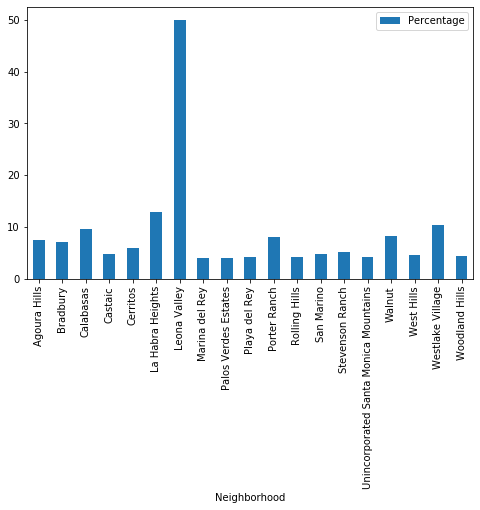

In [63]:
cluster_3 = lafastpricena.loc[lafastpricena['Cluster Labels'] == 3, lafastpricena.columns[[1,4] + list(range(5, lafastpricena.shape[1]))]]
cluster_33 = cluster_3[['Neighborhood','Percentage']]
cluster_33.set_index('Neighborhood', inplace=True)
cluster_33.plot(kind='bar', figsize=(8, 5))

### Cluster 4

In [64]:
cluster_4 = lafastpricena.loc[lafastpricena['Cluster Labels'] == 4, lafastpricena.columns[[1,4] + list(range(5, lafastpricena.shape[1]))]]
cluster_4 = cluster_4.sort_values(by=['Rent_Price'], ascending=False)
cluster_4

Neighborhood   Rent_Price  Percentage
121                       Lancaster  1151.751323   14.814815
95                        Hawthorne  1145.476190    2.777778
90                      Harbor City  1143.551020    5.555556
173                Rancho Dominguez  1135.285714    3.225806
146                   Monterey Park  1132.053571    3.030303
106                       Inglewood  1124.936170    3.571429
80                          Gardena  1121.790476    2.777778
62                     East Compton  1120.428571    9.375000
98                    Highland Park  1119.428571    5.555556
52                           Cudahy  1114.476190    3.448276
198                  South El Monte  1092.380952    4.081633
21                     Bell Gardens  1085.761905    3.333333
202               South San Gabriel  1075.761905    3.773585
196                     Signal Hill  1070.000000    2.702703
132                         Lynwood  1065.597403    9.677419
134               Manchester Square  1061.000000    3.030303
50                          Compton  1048.958333    2.941176
104                       Hyde Park  1044.771429    3.333333
44              Chesterfield Square  1043.190476    3.846154
84                    Gramercy Park  1033.428571    2.222222
124                    Leimert Park  1025.571429    4.347826
91                   Harbor Gateway  1017.232143    2.439024
199                      South Gate  1004.081633    6.451613
20                             Bell  1002.346939    3.448276
240                    West Compton  1000.142857    2.325581
17           Baldwin Hills/Crenshaw  1000.102041    4.347826
125                          Lennox   977.685714    3.333333
139                         Maywood   976.510204    3.125000
12                           Athens   953.571429    2.127660
49                         Commerce   915.952381    3.333333
218  Unincorporated Catalina Island   835.428571   33.333333

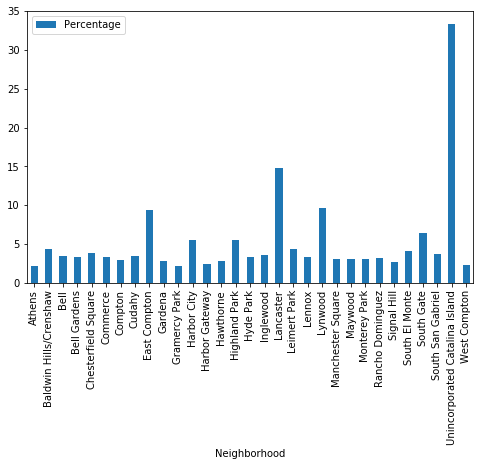

In [65]:
cluster_4 = lafastpricena.loc[lafastpricena['Cluster Labels'] == 4, lafastpricena.columns[[1,4] + list(range(5, lafastpricena.shape[1]))]]
cluster_44 = cluster_4[['Neighborhood','Percentage']]
cluster_44.set_index('Neighborhood', inplace=True)
cluster_44.plot(kind='bar', figsize=(8, 5))

In [66]:
la_geo = r'Los_Angeles_Neighborhood_Map.geojson' # geojson file

In [67]:
# create map
la_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# generate choropleth map using the percentage of Fast Food Restaurants over to other Restaurants in LA.
la_clusters.choropleth(
    geo_data=la_geo,
    data=lafastpricena,
    columns=['Neighborhood','Percentage'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Fast Food Restaurant Ratio')
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lafastpricena['Latitude'], lafastpricena['Longitude'], lafastpricena['Neighborhood'], lafastpricena['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(la_clusters)

# display map
la_clusters

       